In [14]:
file = 'ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq187-sep0.1-rad0.35-mass0.05-mh100-co0.5-phase0/cloud-free-model-inputs.pkl'
pdict, sdict, cdict = pickle.load(open(file, 'rb'))

In [19]:
sdict

{'Teff': 3000.0, 'logg': 5.0, 'mh': 1.0, 'radius': 0.2}

<IPython.core.display.Javascript object>


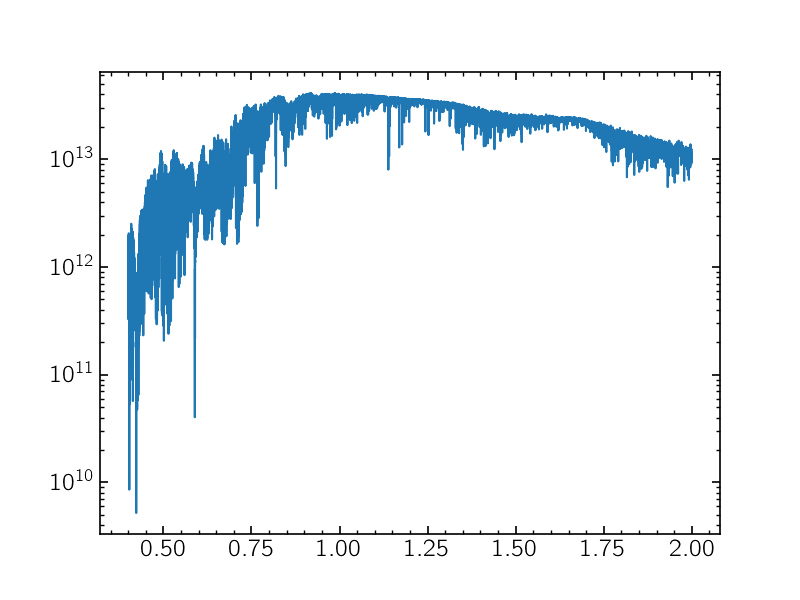

In [18]:
import picaso.justdoit as jdi
opa_mon = jdi.opannection(wave_range=[0.4,2.0])
spec = jdi.inputs(calculation='planet')

spec.phase_angle(phase=pdict['phase']*np.pi/180, num_tangle=pdict['num_tangle'],
                 num_gangle=pdict['num_gangle'])
if not pdict['gravity']:
    spec.gravity(radius=pdict['radius'], radius_unit=pdict['radius_unit'], 
        mass = pdict['mass'], mass_unit=pdict['mass_unit'])
else:
    spec.gravity(gravity=pdict['gravity'], gravity_unit=pdict['gravity_unit'])

# set up star:
spec.star(opa_mon, temp = sdict['Teff'], metal = np.log10(sdict['mh']), logg = sdict['logg'], 
        radius = sdict['radius'], radius_unit = u.R_sun, 
        semi_major = pdict['semi_major'], semi_major_unit = pdict['semi_major_unit'], database = 'phoenix')

%matplotlib notebook
plt.plot(1e4/spec.inputs['star']['wno'],(spec.inputs['star']['flux']))
plt.gca().set_yscale('log')


<IPython.core.display.Javascript object>


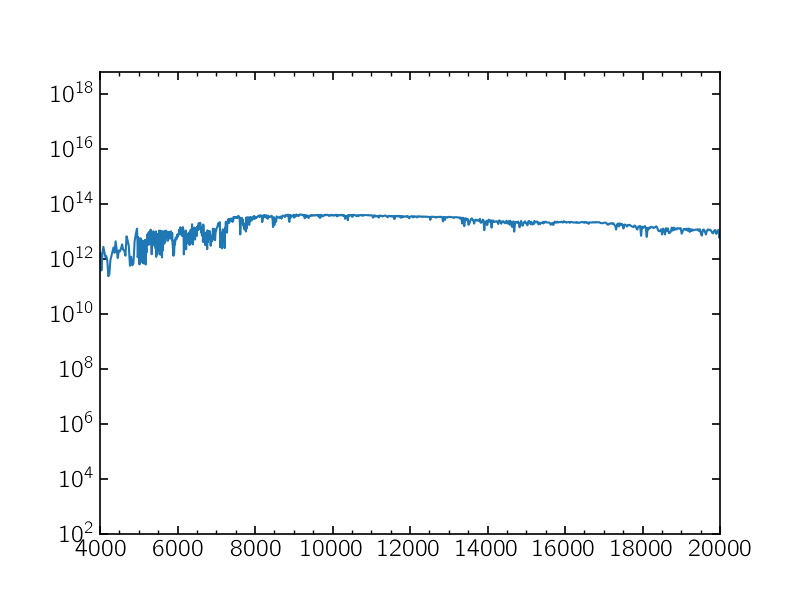

(100, 6.272663653885274e+18)

In [36]:
ph = fits.open('phoenixm10_3000.fits')[1]

from astropy.table import Table
ph = Table(ph.data)
ph5w = ph['WAVELENGTH']
ph5 = ph['g50']
ph
%matplotlib notebook
plt.plot(ph5w,ph5*(1/u.AA).to(1/u.cm))
plt.gca().set_yscale('log')
plt.xlim(0.4*u.um.to(u.AA),2.0*u.um.to(u.AA))
plt.ylim(bottom=100)

In [37]:
file = 'ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq187-sep0.1-rad0.35-mass0.05-mh100-co0.5-phase0/cloud-free-spectrum-full-output-R150.pkl'
outdict = pickle.load(open(file, 'rb'))
outdict

{'wavenumber': array([ 4996.94382181,  5030.3681952 ,  5064.01614299,  5097.88916067,
         5131.98875372,  5166.31643769,  5200.87373827,  5235.66219137,
         5270.68334316,  5305.93875013,  5341.42997923,  5377.15860785,
         5413.12622396,  5449.33442613,  5485.78482363,  5522.47903649,
         5559.4186956 ,  5596.60544273,  5634.04093064,  5671.72682315,
         5709.66479521,  5747.85653297,  5786.30373386,  5825.00810667,
         5863.97137159,  5903.19526037,  5942.68151629,  5982.43189432,
         6022.44816118,  6062.73209536,  6103.28548731,  6144.11013939,
         6185.20786608,  6226.58049395,  6268.2298618 ,  6310.15782074,
         6352.36623426,  6394.8569783 ,  6437.63194136,  6480.69302458,
         6524.04214181,  6567.68121968,  6611.61219774,  6655.83702849,
         6700.35767751,  6745.17612351,  6790.29435845,  6835.71438761,
         6881.43822966,  6927.46791682,  6973.80549486,  7020.45302325,
         7067.41257525,  7114.68623796,  7162.2761

In [43]:
[print(len(outdict[key])) for key in outdict.keys()]

242
242
242
13
242
16094
16094


[None, None, None, None, None, None, None]

In [44]:
from scipy.interpolate import interp1d
func = interp1d(outdict['star wavenumber'],outdict['star flux'],fill_value="extrapolate")
ResampledStarFlux = func(outdict['wavenumber'])

In [46]:
df = pd.DataFrame(data={
    
}
)
df['wavelength [um]'] = 1e4/outdict['wavenumber']
df['planet flux [ergs/cm2/s/cm]'] = outdict['planet flux']
df['star flux [ergs/cm2/s/cm]'] = ResampledStarFlux
df['albedo spectrum'] = outdict['albedo spectrum']
df['planet star contrast'] = outdict['planet star contrast']
df

,wavelength [um],planet flux [ergs/cm2/s/cm],star flux [ergs/cm2/s/cm],albedo spectrum,planet star contrast
0,2.001223,2.862777e+02,1.223023e+13,2.340739e-11,2.340739e-11
1,1.987926,1.719802e+02,1.114631e+13,1.542934e-11,1.542934e-11
2,1.974717,1.500685e+02,1.299343e+13,1.154957e-11,1.154957e-11
3,1.961596,1.646002e+02,1.333335e+13,1.234500e-11,1.234500e-11
4,1.948562,1.354363e+02,1.227296e+13,1.103534e-11,1.103534e-11
...,...,...,...,...,...
237,0.412200,3.008568e+06,1.749541e+12,1.719632e-06,1.719632e-06
238,0.409461,3.379882e+06,1.868205e+12,1.809160e-06,1.809160e-06
239,0.406740,2.828290e+06,1.625202e+12,1.740270e-06,1.740270e-06
240,0.404038,2.219757e+06,1.325115e+12,1.675144e-06,1.675144e-06


In [ ]:
from myastrotools.tijuca import RegridSpectrum
RegridSpectrum(directory, spectrum_full_output_pickle_file, R, make4spectrumplot = False)